No handles with labels found to put in legend.


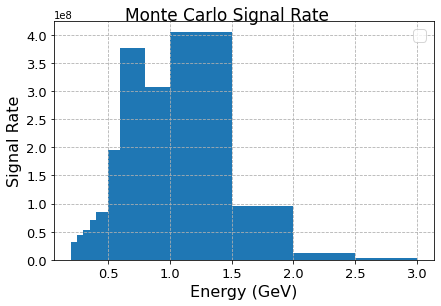

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append("/Users/taozhou/Desktop/Neutrinos/SterileNeutrinoDecay/muB_oscillation")
import itertools
from MicroTools import *

MiniBooNE_Signal = np.loadtxt('/Users/taozhou/Documents/GitHub/muB_oscillation/MicroTools/MB_data/data_release_2018/miniboone_numunuefullosc_ntuple.txt')
MiniBooNE_Signal_PANM_True = np.loadtxt('/Users/taozhou/Documents/GitHub/muB_oscillation/MicroTools/MB_data/MB_osc_tables/dm-MB-events-table-TrueEnu.dat')
MB_True_Bins = np.array([0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000])
Ereco = MiniBooNE_Signal[:,0] # MeV
Etrue = MiniBooNE_Signal[:,1] # MeV
Length = MiniBooNE_Signal[:,2]/100 # meters
Weight = MiniBooNE_Signal[:,3]
# Event rate from Pedro's file. Here we use the data in line 57 where dm41 is 0.0363
event_rate = MiniBooNE_Signal_PANM_True[400,1:]
# LSND & MiniBooNE joint best-fit from 1911.01447
Um4Sq_bf, gDm4_bf = 0.063, 1.17
# MiniBooNE 3+1 best fit
ssq_bf, dmsq_bf = 1, 100
Pmm_weighted = [((1-Um4Sq_bf)**2 + Um4Sq_bf**2*np.exp(-gDm4_bf**2*Length[i]/(32*np.pi*Etrue[i])))*Weight[i] for i in range(MiniBooNE_Signal.shape[0])]
Pme_weighted = [(Um4Sq_bf*(1-np.exp(-gDm4_bf**2*Length[i]/(32*np.pi*Etrue[i]))))*Weight[i] for i in range(MiniBooNE_Signal.shape[0])]
Pmm_weighted_nodecay = [(1-ssq_bf*np.sin(1.267*dmsq_bf*Length[i]/Etrue[i])**2)*Weight[i] for i in range(MiniBooNE_Signal.shape[0])]
Pme_weighted_nodecay = [ssq_bf*np.sin(1.267*dmsq_bf*Length[i]/Etrue[i])**2*Weight[i] for i in range(MiniBooNE_Signal.shape[0])]

fig,ax = plt.subplots(1,1,figsize = (6,4),gridspec_kw=dict(left=0.1, right=0.98,bottom=0.1, top=0.93))
ax.hist(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)
ax.set_xlabel("Energy (GeV)", fontsize = 16)
ax.set_ylabel("Signal Rate", fontsize = 16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.grid(linestyle="--")
ax.legend(loc="upper right",fontsize=16)
fig.suptitle(r'Monte Carlo Signal Rate', fontsize = 17)
fig.savefig("signal_rate_mu_e_reco_monte.png")

No handles with labels found to put in legend.


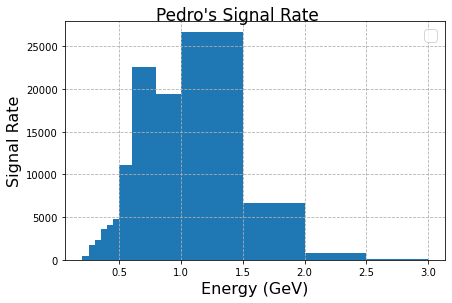

In [40]:

bin_widths = [MB_True_Bins[i + 1] - MB_True_Bins[i] for i in range(len(MB_True_Bins) - 1)]
fig2,ax2 = plt.subplots(1,1,figsize = (6,4),gridspec_kw=dict(left=0.1, right=0.98,bottom=0.1, top=0.93))
ax2.bar(MB_True_Bins[:-1], event_rate, width=bin_widths, align='edge')
ax2.set_xlabel("Energy (GeV)", fontsize = 16)
ax2.set_ylabel("Signal Rate", fontsize = 16)
ax2.grid(linestyle="--")
ax2.legend(loc="upper right",fontsize=16)
fig2.suptitle(r"Pedro's Signal Rate", fontsize = 17)
fig2.savefig("signal_rate_mu_e_reco_pedro.png")

In [23]:
#dm41=0.01
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
confac = [counts[i]/event_rate[i] for i in range(len(event_rate))]
print(confac)

[53482.0610926472, 24620.041515979032, 21724.257808816048, 23820.554374647872, 23761.192134668956, 22479.72001439252, 21823.307423514543, 23115.68710083982, 23950.419795077563, 24109.855883648168, 25927.210969480846, 40096.78863959773, 116120.60344660381]


In [26]:
#dm41=0.1
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
confac = [counts[i]/event_rate[i] for i in range(len(event_rate))]
print(confac)

[53979.19461816139, 24745.24693601959, 21783.177236206237, 23850.16479795947, 23776.274947667836, 22484.831840101546, 21821.059881355828, 23108.0639360733, 23940.513691098902, 24101.429926061377, 25916.077037679785, 40056.67776429544, 115964.67864175075]


In [29]:
#dm41=1
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
confac = [counts[i]/event_rate[i] for i in range(len(event_rate))]
print(confac)

[808719.2787032826, 67778.48312476666, 34998.87441233999, 29688.044235212525, 26679.452724915693, 23773.661836542207, 21975.057930906558, 22515.49577034415, 23060.369326321823, 23312.351156337972, 24875.01783055879, 36346.56929893081, 101618.5860712921]


In [32]:
#dm41=10
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
confac = [counts[i]/event_rate[i] for i in range(len(event_rate))]
print(confac)

[108462.22898782173, 37295.43558064642, 31176.889404722104, 28103.47255064598, 50702.39503039601, 18522.132156637064, 30764.498864121237, 27046.021291278474, 18008.749081925234, 25069.164380373644, 19750.840368681263, 85094.6175704204, 38316.433984130745]


In [37]:
#dm41=100
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
confac = [counts[i]/event_rate[i] for i in range(len(event_rate))]
print(confac)

[90822.45001534662, 40817.31932089092, 32144.611045316302, 30830.03099935945, 30664.555685705516, 28241.56094230318, 25964.959128217957, 23703.29158471702, 23873.53174482077, 22067.03546933506, 20707.060245859313, 20776.657774613937, 25332.306454512418]


In [41]:
#dm41=1000
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
confac = [counts[i]/event_rate[i] for i in range(len(event_rate))]
print(confac)

[100805.8407755204, 39697.448379052694, 32282.225763531114, 30400.55179843082, 29680.975108365146, 26368.106881711596, 24641.500413357982, 25324.937170881323, 23434.183294352286, 22043.976275225763, 20352.323463132667, 22975.487716963926, 42182.18277788134]


No handles with labels found to put in legend.


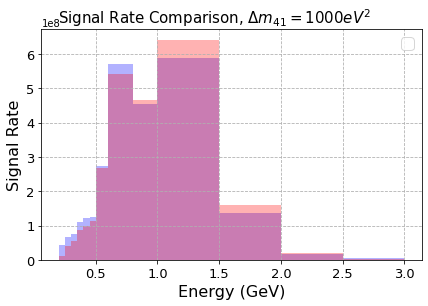

In [60]:
bin_widths = [MB_True_Bins[i + 1] - MB_True_Bins[i] for i in range(len(MB_True_Bins) - 1)]
fig,ax = plt.subplots(1,1,figsize = (6,4),gridspec_kw=dict(left=0.1, right=0.98,bottom=0.1, top=0.90))
ax.hist(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay,alpha=0.3,color='b')
ax.bar(MB_True_Bins[:-1], event_rate*24000, width=bin_widths, align='edge',alpha=0.3,color='r')
ax.set_xlabel("Energy (GeV)", fontsize = 16)
ax.set_ylabel("Signal Rate", fontsize = 16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.grid(linestyle="--")
ax.legend(loc="upper right",fontsize=16)
fig.suptitle(r'Signal Rate Comparison, $\Delta m_{41}=1000eV^2$', fontsize = 15)
fig.savefig("signal_rate_comparison.png")

No handles with labels found to put in legend.


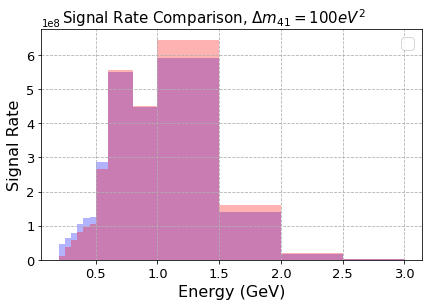

In [63]:
bin_widths = [MB_True_Bins[i + 1] - MB_True_Bins[i] for i in range(len(MB_True_Bins) - 1)]
fig,ax = plt.subplots(1,1,figsize = (6,4),gridspec_kw=dict(left=0.1, right=0.98,bottom=0.1, top=0.90))
ax.hist(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay,alpha=0.3,color='b')
ax.bar(MB_True_Bins[:-1], event_rate*24000, width=bin_widths, align='edge',alpha=0.3,color='r')
ax.set_xlabel("Energy (GeV)", fontsize = 16)
ax.set_ylabel("Signal Rate", fontsize = 16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.grid(linestyle="--")
ax.legend(loc="upper right",fontsize=16)
fig.suptitle(r'Signal Rate Comparison, $\Delta m_{41}=100eV^2$', fontsize = 15)
fig.savefig("signal_rate_comparison_100eV.png")

No handles with labels found to put in legend.


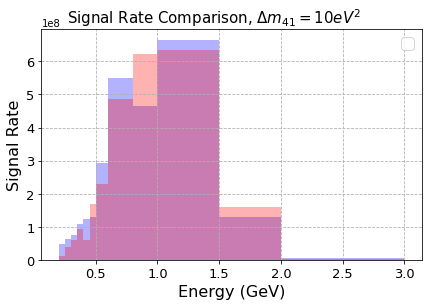

In [65]:
bin_widths = [MB_True_Bins[i + 1] - MB_True_Bins[i] for i in range(len(MB_True_Bins) - 1)]
fig,ax = plt.subplots(1,1,figsize = (6,4),gridspec_kw=dict(left=0.1, right=0.98,bottom=0.1, top=0.90))
ax.hist(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay,alpha=0.3,color='b')
ax.bar(MB_True_Bins[:-1], event_rate*24000, width=bin_widths, align='edge',alpha=0.3,color='r')
ax.set_xlabel("Energy (GeV)", fontsize = 16)
ax.set_ylabel("Signal Rate", fontsize = 16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.grid(linestyle="--")
ax.legend(loc="upper right",fontsize=16)
fig.suptitle(r'Signal Rate Comparison, $\Delta m_{41}=10eV^2$', fontsize = 15)
fig.savefig("signal_rate_comparison_10eV.png")

No handles with labels found to put in legend.


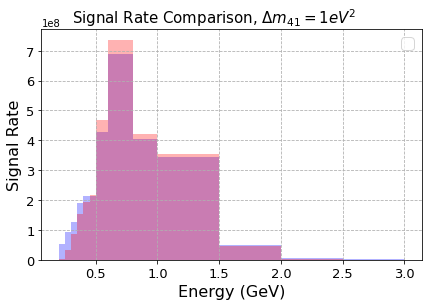

In [67]:
bin_widths = [MB_True_Bins[i + 1] - MB_True_Bins[i] for i in range(len(MB_True_Bins) - 1)]
fig,ax = plt.subplots(1,1,figsize = (6,4),gridspec_kw=dict(left=0.1, right=0.98,bottom=0.1, top=0.90))
ax.hist(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay,alpha=0.3,color='b')
ax.bar(MB_True_Bins[:-1], event_rate*24000, width=bin_widths, align='edge',alpha=0.3,color='r')
ax.set_xlabel("Energy (GeV)", fontsize = 16)
ax.set_ylabel("Signal Rate", fontsize = 16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.grid(linestyle="--")
ax.legend(loc="upper right",fontsize=16)
fig.suptitle(r'Signal Rate Comparison, $\Delta m_{41}=1eV^2$', fontsize = 15)
fig.savefig("signal_rate_comparison_1eV.png")

In [73]:
#dm41=1
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
total_ratio=sum(counts)/sum(event_rate)
print(total_ratio)

24889.465802618088


In [75]:
#dm41=10
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
total_ratio=sum(counts)/sum(event_rate)
print(total_ratio)

24903.643018955914


In [89]:
#dm41=100
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
total_ratio=sum(counts)/sum(event_rate)
print(total_ratio)

24810.836114511152


In [79]:
#dm41=1000
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
total_ratio=sum(counts)/sum(event_rate)
print(total_ratio)

24840.40945932887


In [81]:
#dm41=0.1
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
total_ratio=sum(counts)/sum(event_rate)
print(total_ratio)

24264.526836931775


In [83]:
#dm41=0.01
counts = np.histogram(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)[0]
# This array stores conversion factor between Monte Carlo signal rate and Pedro's event rate
total_ratio=sum(counts)/sum(event_rate)
print(total_ratio)

24252.947994623286


22329.58007749768
